# data processing

In [5]:
# 导入必要的库
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
df = pd.read_csv('synthetic_data.csv', index_col=0)
# print(df.head())
# print(df.describe())

# 数据预处理
# 1. 处理缺失值(如果有的话)
df = df.dropna()

# 2. 编码分类变量
le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# 3. 分离特征和目标变量
X = df.drop(['Label', 'Employee code/number'], axis=1)  # 假设我们不使用员工编号作为特征
y = df['Label']

# 4. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

               Age  Years of working experience  \
count  1100.000000                  1100.000000   
mean     36.999091                    11.221818   
std       9.037230                     7.825548   
min      18.000000                     0.000000   
25%      30.000000                     6.000000   
50%      36.000000                    10.000000   
75%      43.000000                    15.000000   
max      60.000000                    40.000000   

       Years within current field of employment  Employee code/number  \
count                               1100.000000           1100.000000   
mean                                   7.011818           1028.157273   
std                                    6.223093            598.915204   
min                                    0.000000              1.000000   
25%                                    3.000000            504.250000   
50%                                    5.000000           1026.500000   
75%                          

# Naive bayes

In [11]:
from sklearn.naive_bayes import GaussianNB

# 5. 创建并训练朴素贝叶斯模型
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# 6. 在测试集上进行预测
y_pred = nb_model.predict(X_test)

# 7. 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
print(f"准确率: {accuracy:.4f}")

print("\n分类报告:")
print(classification_report(y_test, y_pred))

# # 8. 绘制混淆矩阵
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title('朴素贝叶斯模型混淆矩阵')
# plt.xlabel('预测标签')
# plt.ylabel('真实标签')
# plt.show()

# # 9. 特征重要性（朴素贝叶斯没有内置的特征重要性，但我们可以使用类条件概率）
# feature_importance = np.abs(nb_model.theta_[1] - nb_model.theta_[0])
# feature_names = X.columns

# # 按重要性排序并展示前10个特征
# sorted_idx = np.argsort(feature_importance)
# top_10_idx = sorted_idx[-10:]

# plt.figure(figsize=(10, 6))
# plt.title("朴素贝叶斯模型 - 特征重要性（基于类条件概率差异）")
# plt.barh(range(10), feature_importance[top_10_idx])
# plt.yticks(range(10), feature_names[top_10_idx])
# plt.xlabel("重要性（类条件概率差异的绝对值）")
# plt.tight_layout()
# plt.show()

准确率: 0.9591

分类报告:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       175
           1       0.95      0.84      0.89        45

    accuracy                           0.96       220
   macro avg       0.96      0.92      0.93       220
weighted avg       0.96      0.96      0.96       220



# Support vector machines

In [15]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 5. 特征缩放（SVM对特征的尺度敏感）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. 创建并训练SVM模型
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# 7. 在测试集上进行预测
y_pred = svm_model.predict(X_test_scaled)

# 8. 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
print(f"准确率: {accuracy:.4f}")

print("\n分类报告:")
print(classification_report(y_test, y_pred))

# # 9. 绘制混淆矩阵
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title('SVM模型混淆矩阵')
# plt.xlabel('预测标签')
# plt.ylabel('真实标签')
# plt.show()

# # 10. 特征重要性（使用基于SVM的特征选择方法）
# from sklearn.feature_selection import RFE

# # 创建RFE对象，选择所有特征
# rfe = RFE(estimator=SVC(kernel="linear"), n_features_to_select=len(X.columns), step=1)
# rfe = rfe.fit(X_train_scaled, y_train)

# # 获取特征重要性
# feature_importance = rfe.ranking_
# feature_names = X.columns

# # 按重要性排序并展示前10个特征
# sorted_idx = np.argsort(feature_importance)
# top_10_idx = sorted_idx[:10]  # 注意：这里是从小到大排序，因为ranking_值越小越重要

# plt.figure(figsize=(10, 6))
# plt.title("SVM模型 - 特征重要性（基于RFE）")
# plt.barh(range(10), feature_importance[top_10_idx])
# plt.yticks(range(10), feature_names[top_10_idx])
# plt.xlabel("重要性排名（越小越重要）")
# plt.tight_layout()
# plt.show()

准确率: 0.9545

分类报告:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       175
           1       0.97      0.80      0.88        45

    accuracy                           0.95       220
   macro avg       0.96      0.90      0.93       220
weighted avg       0.96      0.95      0.95       220



# Logistic regression

In [20]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

# 5. 特征缩放（虽然对逻辑回归不是必须的，但通常可以提高性能）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. 创建并训练逻辑回归模型
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# 7. 在测试集上进行预测
y_pred = lr_model.predict(X_test_scaled)

# 8. 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
print(f"准确率: {accuracy:.4f}")

print("\n分类报告:")
print(classification_report(y_test, y_pred))

# # 9. 绘制混淆矩阵
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title('逻辑回归模型混淆矩阵')
# plt.xlabel('预测标签')
# plt.ylabel('真实标签')
# plt.show()

# # 10. 特征重要性（基于特征系数的绝对值）
# feature_importance = np.abs(lr_model.coef_[0])
# feature_names = X.columns

# # 按重要性排序并展示前10个特征
# sorted_idx = np.argsort(feature_importance)
# top_10_idx = sorted_idx[-10:]

# plt.figure(figsize=(10, 6))
# plt.title("逻辑回归模型 - 特征重要性")
# plt.barh(range(10), feature_importance[top_10_idx])
# plt.yticks(range(10), feature_names[top_10_idx])
# plt.xlabel("特征系数的绝对值")
# plt.tight_layout()
# plt.show()

# # 11. 输出模型系数
# coefficients = pd.DataFrame({
#     'Feature': X.columns,
#     'Coefficient': lr_model.coef_[0]
# })
# coefficients = coefficients.sort_values('Coefficient', key=abs, ascending=False)
# print("\n逻辑回归模型系数:")
# print(coefficients)

准确率: 0.9727

分类报告:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       175
           1       0.95      0.91      0.93        45

    accuracy                           0.97       220
   macro avg       0.97      0.95      0.96       220
weighted avg       0.97      0.97      0.97       220



# Random Forest

Accuracy: 0.9636363636363636

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       175
           1       0.97      0.84      0.90        45

    accuracy                           0.96       220
   macro avg       0.97      0.92      0.94       220
weighted avg       0.96      0.96      0.96       220



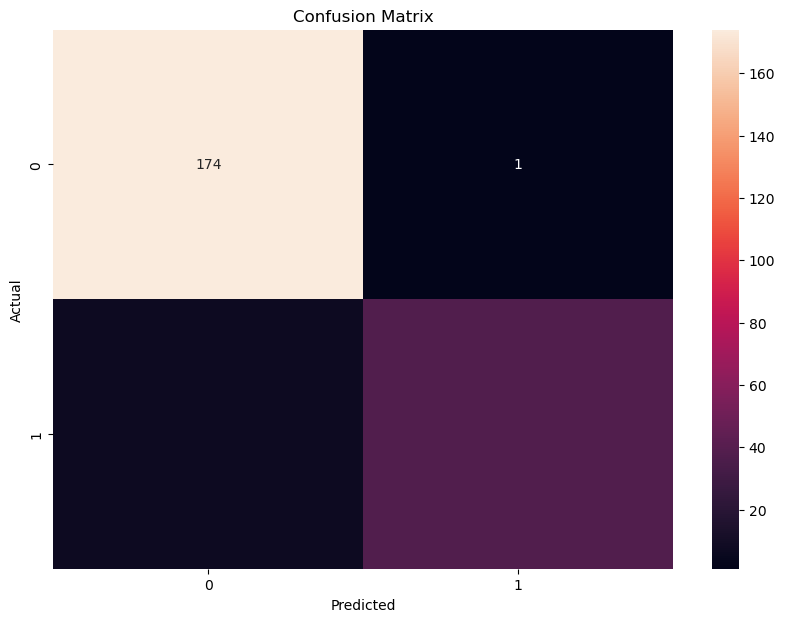

In [3]:
# 训练Random Forest模型
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = rf_model.predict(X_test)

# 评估模型
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 混淆矩阵
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

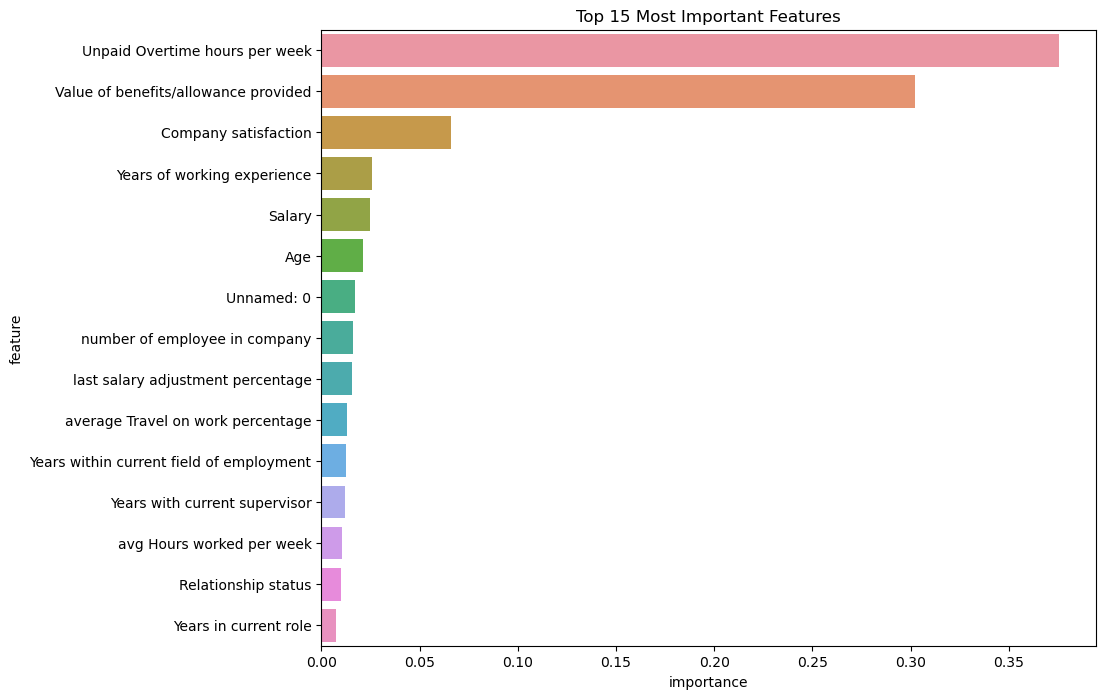


Top 15 Most Important Features:
                                     feature  importance
16            Unpaid Overtime hours per week    0.375659
13      Value of benefits/allowance provided    0.302135
27                      Company satisfaction    0.066177
6                Years of working experience    0.025661
11                                    Salary    0.024551
2                                        Age    0.021136
0                                 Unnamed: 0    0.017131
21             number of employee in company    0.015956
22         last salary adjustment percentage    0.015820
23         average Travel on work percentage    0.013101
7   Years within current field of employment    0.012454
19             Years with current supervisor    0.012289
12                 avg Hours worked per week    0.010592
3                        Relationship status    0.010115
18                     Years in current role    0.007417


In [4]:
# 特征重要性
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Most Important Features')
plt.show()

# 打印前15个最重要的特征
print("\nTop 15 Most Important Features:")
print(feature_importance.head(15))

# XGBoost

/Users/pengjiabeitang/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [15:46:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9636363636363636

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       175
           1       0.95      0.87      0.91        45

    accuracy                           0.96       220
   macro avg       0.96      0.93      0.94       220
weighted avg       0.96      0.96      0.96       220



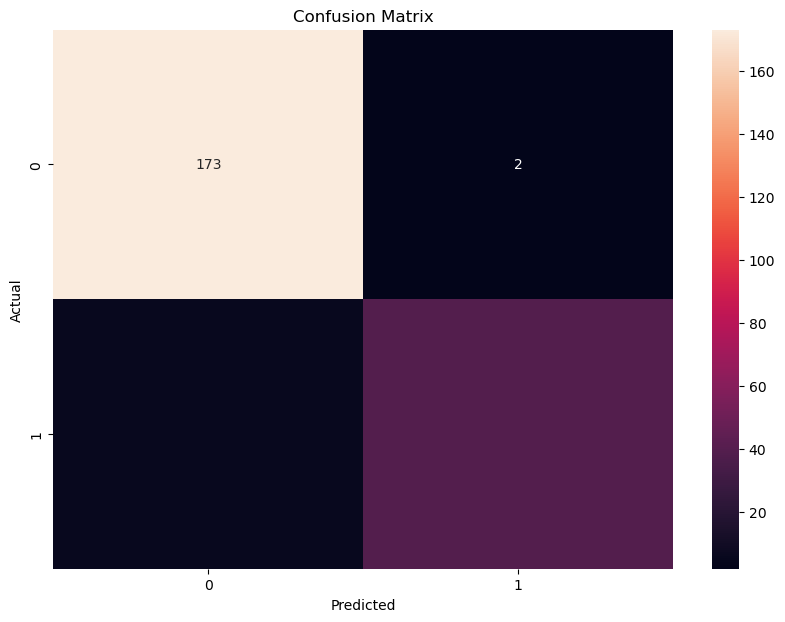

In [7]:
# 导入XGBoost
import xgboost as xgb

# 训练XGBoost模型
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = xgb_model.predict(X_test)

# 评估模型
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 混淆矩阵
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# import pickle

# # 保存模型
# with open('xgboost_model.pkl', 'wb') as model_file:
#     pickle.dump(xgb_model, model_file)

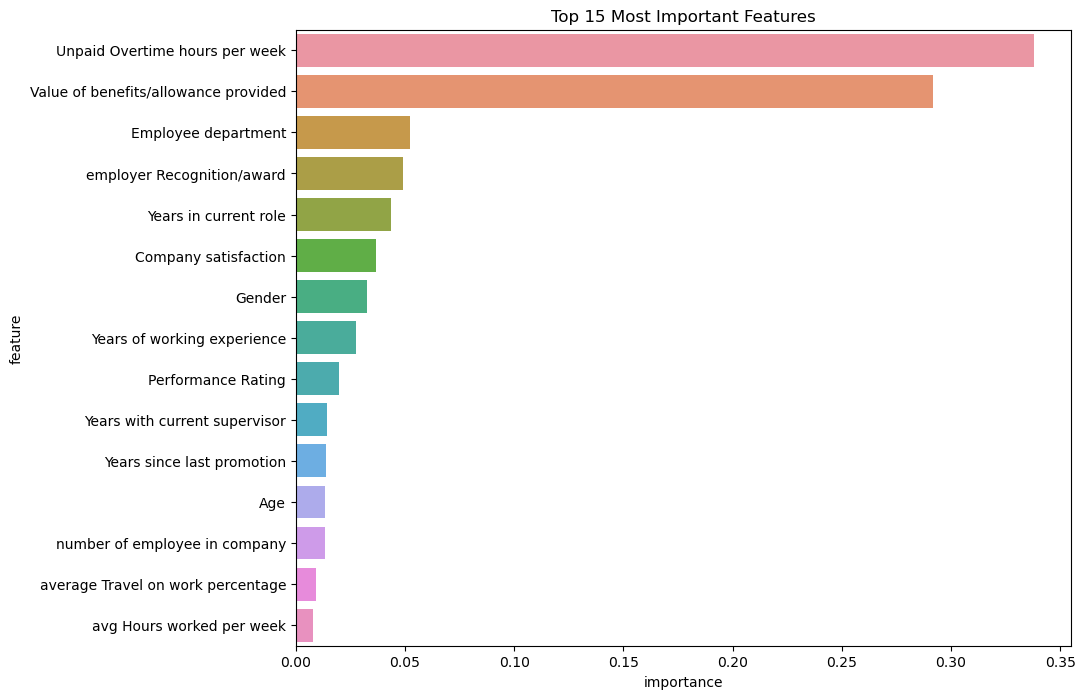


Top 15 Most Important Features:
                                 feature  importance
15        Unpaid Overtime hours per week    0.337907
12  Value of benefits/allowance provided    0.291954
16                   Employee department    0.052473
24            employer Recognition/award    0.048975
17                 Years in current role    0.043561
26                  Company satisfaction    0.036934
0                                 Gender    0.032633
5            Years of working experience    0.027493
13                    Performance Rating    0.019697
18         Years with current supervisor    0.014181
19            Years since last promotion    0.013697
1                                    Age    0.013310
20         number of employee in company    0.013154
22     average Travel on work percentage    0.009078
11             avg Hours worked per week    0.008011


In [8]:
# 特征重要性
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': xgb_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Most Important Features')
plt.show()

# 打印前15个最重要的特征
print("\nTop 15 Most Important Features:")
print(feature_importance.head(15))

# # SHAP值分析 (可选,但提供更详细的特征影响分析)
# import shap

# explainer = shap.TreeExplainer(xgb_model)
# shap_values = explainer.shap_values(X_test)

# plt.figure(figsize=(10,8))
# shap.summary_plot(shap_values, X_test, plot_type="bar")
# plt.show()

# # 单个预测的SHAP值分析
# plt.figure(figsize=(10,8))
# shap.summary_plot(shap_values, X_test)
# plt.show()

# RFRSF Hybrid model

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sksurv.ensemble import RandomSurvivalForest
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sksurv.metrics import concordance_index_censored
from sklearn.metrics import roc_curve

# 数据加载和预处理（保持不变）
data = pd.read_csv('synthetic_data.csv', index_col=0)

le = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

X = data.drop(['Label', 'Employee code/number'], axis=1)
y = data['Label']
time = data['Years in current role']

y_surv = np.array([(bool(y_i), t_i) for y_i, t_i in zip(y, time)], 
                  dtype=[('Label', bool), ('time', float)])

# 特征选择
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')
X_selected = selector.fit_transform(X, y)

# 获取被选中的特征名称
selected_feature_names = X.columns[selector.get_support()].tolist()

# 分割数据
X_train, X_test, y_train, y_test, y_surv_train, y_surv_test = train_test_split(
    X_selected, y, y_surv, test_size=0.2, random_state=42)

# 标准化特征
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 训练RSF模型（限制树的深度和数量）
rsf = RandomSurvivalForest(n_estimators=50, max_depth=10, min_samples_leaf=5, random_state=42)
rsf.fit(X_train_scaled, y_surv_train)

# 预测生存概率
surv_prob_train = rsf.predict(X_train_scaled)
surv_prob_test = rsf.predict(X_test_scaled)

# 将生存概率添加到特征中
X_train_with_surv = np.column_stack((X_train_scaled, surv_prob_train))
X_test_with_surv = np.column_stack((X_test_scaled, surv_prob_test))

# 训练RF分类器（限制树的深度和数量）
rf = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_leaf=5, random_state=42)

# 使用交叉验证
cv_scores = cross_val_score(rf, X_train_with_surv, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

# 在整个训练集上训练最终模型
rf.fit(X_train_with_surv, y_train)

# 在测试集上评估
y_pred = rf.predict(X_test_with_surv)
y_pred_proba = rf.predict_proba(X_test_with_surv)[:, 1]

print("\n随机森林分类器评估：")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("\n分类报告:")
print(classification_report(y_test, y_pred))

# 计算最佳阈值
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"\n最佳阈值: {optimal_threshold:.4f}")

# 使用新阈值进行预测
y_pred_new = (y_pred_proba >= optimal_threshold).astype(int)

print("\n使用最佳阈值的随机森林分类器评估：")
print("Accuracy:", accuracy_score(y_test, y_pred_new))
print("AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("\n分类报告:")
print(classification_report(y_test, y_pred_new))

# 评估随机生存森林
c_index = concordance_index_censored(y_surv_test['Label'], y_surv_test['time'], -rsf.predict(X_test_scaled))
print("\n随机生存森林评估：")
print(f"C-index: {c_index[0]:.4f}")

# 估计最佳生存时间（年）
def estimate_survival_time(rsf, X):
    surv_funcs = rsf.predict_survival_function(X)
    median_survival_times = []
    
    for surv_func in surv_funcs:
        time_points = surv_func.x
        survival_probs = surv_func.y
        median_index = next((i for i, prob in enumerate(survival_probs) if prob <= 0.5), len(survival_probs) - 1)
        median_time = time_points[median_index]
        median_survival_times.append(median_time)
    
    return median_survival_times

survival_times = estimate_survival_time(rsf, X_test_scaled)

# 创建结果数据框
results = pd.DataFrame({
    # 'True_Label': y_test,
    'Predicted_Label': y_pred_new,
    'Turnover_Probability': y_pred_proba,
    'Estimated_Survival_Time': survival_times
})

# 添加原始特征
for i, name in enumerate(selected_feature_names):
    results[name] = X_test[:, i]

# 为host提供建议
def provide_recommendation(prob, time, threshold):
    if prob > threshold * 1.5:  # 高于阈值50%
        return f"High risk: There is a {prob:.1%} probability that this employee will leave within the next {time:.1f} years. It is recommended to take retention measures immediately."
    elif prob >= threshold:
        return f"Medium risk: The employee has a {prob:.1%} probability of leaving within the next {time:.1f} years. It is recommended to closely monitor and consider taking preventive measures."
    else:
        return f"Low risk: This employee has a {prob:.1%} probability of leaving within the next {time:.1f} years. Currently, the risk is low, but regular monitoring is still necessary."

# 为每个员工生成建议
results['Recommendation'] = results.apply(lambda row: provide_recommendation(row['Turnover_Probability'], row['Estimated_Survival_Time'], optimal_threshold), axis=1)

Cross-validation scores: [0.98863636 0.98863636 0.98863636 0.99431818 0.98863636]
Mean CV score: 0.9897727272727271

随机森林分类器评估：
Accuracy: 0.9681818181818181
AUC Score: 0.9884444444444445

分类报告:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       175
           1       0.93      0.91      0.92        45

    accuracy                           0.97       220
   macro avg       0.95      0.95      0.95       220
weighted avg       0.97      0.97      0.97       220


最佳阈值: 0.1980

使用最佳阈值的随机森林分类器评估：
Accuracy: 0.9636363636363636
AUC Score: 0.9884444444444445

分类报告:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       175
           1       0.89      0.93      0.91        45

    accuracy                           0.96       220
   macro avg       0.94      0.95      0.95       220
weighted avg       0.96      0.96      0.96       220


随机生存森林评估：
C-index: 0.0272


In [12]:
# # 打印部分结果和建议
# print("\n部分结果和建议：")
# print(results[['Predicted_Label', 'Turnover_Probability', 'Estimated_Survival_Time', 'Recommendation']].head(10))

# # 分析预测的生存时间分布
# print("\n预测生存时间的统计信息：")
# print(results['Estimated_Survival_Time'].describe())

# 显示所有 Predicted_Label 为 1 的行
print("\n所有预测为离职的员工：")
predicted_turnover = results[results['Predicted_Label'] == 1]
print(predicted_turnover[['Predicted_Label', 'Turnover_Probability', 'Estimated_Survival_Time', 'Recommendation']])


部分结果和建议：
   Predicted_Label  Turnover_Probability  Estimated_Survival_Time  \
0                0              0.004615                     18.0   
1                0              0.021778                     18.0   
2                0              0.000000                     18.0   
3                0              0.000000                     18.0   
4                0              0.002500                     18.0   
5                0              0.053675                     18.0   
6                0              0.000000                     18.0   
7                0              0.014286                     18.0   
8                0              0.015000                     18.0   
9                0              0.000000                     18.0   

                                      Recommendation  
0  Low risk: This employee has a 0.5% probability...  
1  Low risk: This employee has a 2.2% probability...  
2  Low risk: This employee has a 0.0% probability...  
3  Low ris

In [8]:
# 特征重要性分析
feature_importance = rf.feature_importances_
importance_df = pd.DataFrame({
    'feature': selected_feature_names + ['Survival Probability'],
    'importance': feature_importance
})
importance_df = importance_df.sort_values('importance', ascending=False)
print("\n特征重要性：")
print(importance_df)


特征重要性：
                                     feature  importance
14                      Survival Probability    0.493727
6       Value of benefits/allowance provided    0.223465
7             Unpaid Overtime hours per week    0.158996
13                      Company satisfaction    0.051992
2                Years of working experience    0.017025
0                                        Age    0.009880
4                                     Salary    0.009692
1                        Relationship status    0.006625
8                      Years in current role    0.005347
3   Years within current field of employment    0.004674
11         last salary adjustment percentage    0.004650
10             number of employee in company    0.004410
12         average Travel on work percentage    0.003820
9              Years with current supervisor    0.003261
5                  avg Hours worked per week    0.002436


In [13]:
import joblib

# 保存模型和相关对象
joblib.dump(selector, 'RFRSFmodel/feature_selector.joblib')
joblib.dump(scaler, 'RFRSFmodel/scaler.joblib')
joblib.dump(rf, 'RFRSFmodel/random_forest_classifier.joblib')
joblib.dump(rsf, 'RFRSFmodel/random_survival_forest.joblib')
joblib.dump(le, 'RFRSFmodel/label_encoder.joblib')

# 保存最佳阈值
np.save('RFRSFmodel/optimal_threshold.npy', optimal_threshold)

# 保存选中的特征名称
with open('RFRSFmodel/selected_features.txt', 'w') as f:
    for feature in selected_feature_names:
        f.write(f"{feature}\n")

print("模型和相关对象已保存。")

模型和相关对象已保存。


## 测试使用

In [5]:
def predict_employee_turnover(employee_data):
    # 加载模型和相关对象
    selector = joblib.load('RFRSFmodel/feature_selector.joblib')
    scaler = joblib.load('RFRSFmodel/scaler.joblib')
    rf = joblib.load('RFRSFmodel/random_forest_classifier.joblib')
    rsf = joblib.load('RFRSFmodel/random_survival_forest.joblib')
    optimal_threshold = np.load('RFRSFmodel/optimal_threshold.npy')

    # 读取选中的特征名称
    with open('RFRSFmodel/selected_features.txt', 'r') as f:
        selected_features = [line.strip() for line in f]

    # 加载 LabelEncoder
    le = joblib.load('RFRSFmodel/label_encoder.joblib')

    # 打印特征名称以进行调试
    print("Expected features:", selected_features)
    print("Actual features:", employee_data.columns.tolist())

    # 确保所有需要的特征都存在
    for feature in selected_features:
        if feature not in employee_data.columns:
            raise ValueError(f"Feature '{feature}' is missing in the test data")

    # 对分类特征进行编码
    categorical_columns = employee_data.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        if col in selected_features:
            employee_data[col] = le.transform(employee_data[col])
    # 选择特征
    X = employee_data[selected_features]

    # 应用特征选择
    X_selected = selector.transform(X)

    # 标准化特征
    X_scaled = scaler.transform(X_selected)

    # 预测生存概率
    surv_prob = rsf.predict(X_scaled)

    # 将生存概率添加到特征中
    X_with_surv = np.column_stack((X_scaled, surv_prob))

    # 预测离职概率
    turnover_prob = rf.predict_proba(X_with_surv)[:, 1]

    # 预测标签
    predicted_label = (turnover_prob >= optimal_threshold).astype(int)

    # 估计生存时间
    survival_times = estimate_survival_time(rsf, X_scaled)

    # 生成建议
    recommendations = [provide_recommendation(prob, time, optimal_threshold) 
                       for prob, time in zip(turnover_prob, survival_times)]

    # 创建结果DataFrame
    results = pd.DataFrame({
        'Predicted_Label': predicted_label,
        'Turnover_Probability': turnover_prob,
        'Estimated_Survival_Time': survival_times,
        'Recommendation': recommendations
    })

    return results

In [17]:
# import pandas as pd

# # 读取数据
# df = pd.read_csv('synthetic_data.csv', index_col=0)

# # 分别选择label == 0 和 label == 1的25个样本
# df_label_0 = df[df['Label'] == 0].sample(25, random_state=42)
# df_label_1 = df[df['Label'] == 1].sample(25, random_state=42)

# # 合并数据
# df_test = pd.concat([df_label_0, df_label_1])

# # 保存为新的CSV文件
# df_test.to_csv('test_data.csv', index=False)
# print("已成功导出50个样本到test_data.csv文件中。")

已成功导出50个样本到test_data.csv文件中。


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sksurv.ensemble import RandomSurvivalForest
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sksurv.metrics import concordance_index_censored
from sklearn.metrics import roc_curve
import joblib

# 加载新的员工数据
new_data = pd.read_csv('test_data.csv')


# 使用模型进行预测
predictions = predict_employee_turnover(new_data)

# 打印结果
print(predictions)

# # 可选：保存结果到CSV文件
# predictions.to_csv('employee_turnover_predictions.csv', index=False)
# print("预测结果已保存到 'employee_turnover_predictions.csv'")

NameError: name 'le' is not defined